## Open this document in colab (if it is not already done so)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/predictive-clinical-neuroscience/BigDataCourse/blob/main/practicals/Big_data_mouse_practical_2024.ipynb)

## Answers
The answers to this practical are here. We encourage you to try to come to the answers by yourself.
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/predictive-clinical-neuroscience/BigDataCourse/blob/main/practicals/Big_data_mouse_practical_2024_answer.ipynb)

https://github.com/predictive-clinical-neuroscience/BigDataCourse/blob/main/practicals/Big_data_mouse_practical_2024_answer.ipynb

# Big data : Mouse

The objectives of this exercise are to familiarize the students with python, especially the processing of large mouse database. Here, we will use a recently published dataset containing mouse brain volume data from ~ 2000 mice.
<br>
Learning goals:
- The student learns to use python through google collab / jupyter notebook
- The student learns to use pandas to process large datasets
- The student learns to use matplotlib to visualize data
- The student is familar with large mouse datasets
<br>
**References:**
1. Ellegood, J., Anagnostou, E., Babineau, B. et al. Clustering autism: using neuroanatomical differences in 26 mouse models to gain insight into the heterogeneity. Mol Psychiatry 20, 118–125 (2015). https://doi.org/10.1038/mp.2014.98
2. Rivera-Olvera, A., Houwing, D.J., Ellegood, J. et al. The universe is asymmetric, the mouse brain too. Mol Psychiatry (2024). https://doi.org/10.1038/s41380-024-02687-2
3. Original dataset available at: https://portal.conp.ca/dataset?id=projects/braincode_Mouse_Image


## Foreword and environment
This is a Jupyter notebook. This document combines both text (e.g. *this*), and executable code. These are organized into cells. This is a **text** cell.

In [4]:
print('This is a code cell')
# This is a comment. The line above will be executed when you click on the 'play' icon on the left. The comment will not be executed.

This is a code cell


## Environment basics
The default environment is Python3. You can check the version by running the
code in the following cell.

In [5]:
import platform  #the import function loads packages (a collection of functions) that isn't available within the default python environment.

print(platform.python_version()) #the print function *prints* on screen the content therein. In this particular instance, it *prints* the content from the function `platform.python_version()`

3.12.12


## Editing cells.
You can *Double-click* to edit the content of a cell.
<br>
## Adding new cells.
By hovering your mouse above or below a cell, you can add either a *code* cell or a *text* cell
<br>
## Formating text.
You can add emphasis to your text using either the icons on top of the cell while editing, or using [Markdown](https://www.markdownguide.org/cheat-sheet/), a simple text-formating language.
<br><br>
##### 100% optional (but so good!!)
While in Google Colab: Tools -> Settings -> Miscellaneous -> Corgi mode [x]


### Getting familiar with colab:
**Create a code cell, and have it print your name**

In [6]:
print("Maarten Lukas Dekkers")

Maarten Lukas Dekkers


## Environment: packages
By default, Python comes only with minimal functions.  
Google colab comes with pip pre-installed as well as most packages that you would need for most data analysis tasks. These are:
- pandas for data manipulation
- numpy for numerical operations
- matplotlib for plotting
- seaborn for (better) plotting
- scipy for statistics

each needs to be loaded using the `import` command in python.
each package has a manual online with a description of the functions. You can use this as the reference for the functions you will use.

in case you need to install a package, you can use the `!pip install THENAMEOFYOURPACKAGE` command.

## Note on AI use for coding
Google colab comes with AI assited code completion. This can be very useful to find the right function. You can also use chatGPT to help you with the code. **Mind you**, these are not always correct. Using 'old fashioned' methods to find the right function (e.g. google,  stackoverflow, reading the package manual) is often more reliable.

We cannot stop you from using AI (nor should we). However, we do encourage you to try to solve the problems yourself, especially as a beginner, so as to learn the basics.

# Data loading and exploration
The first step in any data analysis is to load the data and explore it. As mentioned earlier, this dataset consists of brain volume data from ~2000 mice. The data is stored in a csv file which we import using the read_csv function from the pandas package.

In [26]:
import pandas as pd #importing the pandas package and renaming it as pd. This is a common practice in python programming.
df = pd.read_csv('https://raw.githubusercontent.com/predictive-clinical-neuroscience/BigDataCourse/main/data/mouse_autism.csv') #from pandas (pd), we use the read_csv function to read the csv file. We store the data in a variable called df, short for data frame.
df.head() #the head function displays the first 5 rows of

/tmp/ipython-input-746348814.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/predictive-clinical-neuroscience/BigDataCourse/main/data/mouse_autism.csv') #from pandas (pd), we use the read_csv function to read the csv file. We store the data in a variable called df, short for data frame.


,Mouse_ID,Study_Name,Is_Wildtype,Mouse_Sex,Mouse_Age,Mouse_Weight,Genotype_Code,dentate_nucleus_right,nucleus_interpositus_left,thalamus_left,...,Olfactory_bulb:_mitral_cell_layer_left,Olfactory_bulb:_internal_plexiform_layer_left,Olfactory_bulb:_granule_cell_layer_left,"Accessory_olfactory_bulb:_glomerular,_external_plexiform_and_mitral_cell_layer_left",Accessory_olfactory_bulb:_granule_cell_layer_left,Anterior_olfactory_nucleus_left,Medial_amygdala_right,Medial_preoptic_nucleus_right,Medial_amygdala_left,Medial_preoptic_nucleus_left
0,TT_15q_717,15q,WT,M,P70-77,NaN,WT,0.177992,0.226057,9.759248,...,0.648162,0.530152,2.149071,0.276940,0.130818,1.019970,0.684956,0.092927,0.576986,0.103273
1,TT_15q_718,15q,MUT,M,P70-77,NaN,pDp,0.182018,0.223815,9.519517,...,0.710666,0.583262,2.422023,0.311462,0.145130,1.127081,0.616302,0.085706,0.607978,0.099528
2,TT_15q_719,15q,WT,M,P70-77,NaN,WT,0.185226,0.243459,10.351511,...,0.760831,0.622254,2.566074,0.293608,0.141564,1.113112,0.611263,0.094016,0.564259,0.104263
3,TT_15q_720,15q,MUT,M,P70-77,NaN,pDp,0.193267,0.243405,9.960148,...,0.728169,0.595189,2.406004,0.275194,0.142664,1.029186,0.657170,0.098554,0.538996,0.098580
4,TT_15q_722,15q,WT,M,P70-77,NaN,WT,0.179960,0.249123,10.408760,...,0.702497,0.574957,2.429699,0.284369,0.140794,1.095187,0.661461,0.097791,0.574480,0.098246


We find that the data consists of many columns, the first 7 are detailing the sample, the remaining columns are the brain volumes for different regions of the brain (e.g. dentate_nucleus_right), expressed in mm^3.
Mouse_ID is the unique identifier for each mouse.
Study_Name is the name of the study the mouse was part of. Usually, this refers to a gene or genetic manipulation to reproduce one aspect of autism spectrum disorder in transgenic mice.
Is_Wildtype indicates if the mouse is a wildtype (WT) mouse or a transgenic (MUT)
Mouse_Sex is the mouse sex
Mouse_Age is the mouse age in days or day range
Mouse_Weight is the mouse weight in grams
Genotype_Code is the genotype code for the mouse (e.g. WT, KO, HET, ...).

## Question 1: data exploration
We want to get some basic information about the dataset. Want to get the following information:
- The total number of rows and colums (hint: use the shape attribute of your dataframe)
- The Mouse_ID at the 15th row of the dataset (hint: use the iloc function, remember that python starts counting at 0)
- The total number of unique studies (hint: use the nunique function, and select the Study_Name column)
- Count how many male and female mice are in the dataset (hint: use the value_counts function and the [] operator to select the colmun you want to count)

Links to hints:
- [shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html)
- [iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)
- [nunique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html)
- [value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)

In [29]:
df.shape

(2298, 343)

In [65]:
df.iloc[15:16]

,Mouse_ID,Study_Name,Is_Wildtype,Mouse_Sex,Mouse_Age,Mouse_Weight,Genotype_Code,dentate_nucleus_right,nucleus_interpositus_left,thalamus_left,...,Olfactory_bulb:_mitral_cell_layer_left,Olfactory_bulb:_internal_plexiform_layer_left,Olfactory_bulb:_granule_cell_layer_left,"Accessory_olfactory_bulb:_glomerular,_external_plexiform_and_mitral_cell_layer_left",Accessory_olfactory_bulb:_granule_cell_layer_left,Anterior_olfactory_nucleus_left,Medial_amygdala_right,Medial_preoptic_nucleus_right,Medial_amygdala_left,Medial_preoptic_nucleus_left
15,TT_15q_749,15q,MUT,M,P70-77,NaN,pDp,0.168167,0.229345,9.472957,...,0.637556,0.524622,2.165012,0.293127,0.14075,1.006428,0.637428,0.098513,0.593916,0.107803


In [46]:
df["Study_Name"].nunique()

63

In [49]:
df.value_counts("Mouse_Sex")

,count
Mouse_Sex,
M,1369
F,815


## Question 2: data manipulation
Here we want to learn to manipulate the data for our purposes.
- Create a subset of df that only contains the columns from the 8th to the last column (hint: use the iloc function with the : operator)
- Create a new column in df that contains the total brain volume for each mouse. This is the sum of all the columns from your previously subsetted dataframe (hint: use the sum function with the axis=1 argument, the total brain volume should be in the 500 mm^3 range)
- Create a subset of df that only contains the data for the 'Chd8_Basson' study. Chd8 is a gene that is associated with an enlarged brain in autism. **You should have 24 rows left!** (hint: use the [] operator with a condition inside to select only the rows that match, e.g. df[df['YOURCOLUMN']=='YOURVALUE'])

Links to hints:
- [using operators in pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)
- [iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)
- [sum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html)

In [69]:
subset1 = df.iloc[:,7:]
print(subset1)

      dentate_nucleus_right  nucleus_interpositus_left  thalamus_left  \
0                  0.177992                   0.226057       9.759248   
1                  0.182018                   0.223815       9.519517   
2                  0.185226                   0.243459      10.351511   
3                  0.193267                   0.243405       9.960148   
4                  0.179960                   0.249123      10.408760   
...                     ...                        ...            ...   
2293               0.198794                   0.251125      10.088917   
2294               0.179584                   0.248175      10.533495   
2295               0.162481                   0.245166      10.339132   
2296               0.180171                   0.237523      10.069469   
2297               0.196038                   0.267868      10.199324   

      olfactory_peduncle_right  striatum_right  corpus_callosum_right  \
0                     1.154763       11.250587    

In [71]:

df['total_brain'] = subset1.sum(axis=1)
print(df)

        Mouse_ID Study_Name Is_Wildtype Mouse_Sex Mouse_Age  Mouse_Weight  \
0     TT_15q_717        15q          WT         M    P70-77           NaN   
1     TT_15q_718        15q         MUT         M    P70-77           NaN   
2     TT_15q_719        15q          WT         M    P70-77           NaN   
3     TT_15q_720        15q         MUT         M    P70-77           NaN   
4     TT_15q_722        15q          WT         M    P70-77           NaN   
...          ...        ...         ...       ...       ...           ...   
2293   img_354_2      Mthfr         NaN       NaN       NaN           NaN   
2294   img_356_1      Mthfr         NaN       NaN       NaN           NaN   
2295   img_358_1      Mthfr         NaN       NaN       NaN           NaN   
2296   img_360_1      Mthfr         NaN       NaN       NaN           NaN   
2297   img_362_1      Mthfr         NaN       NaN       NaN           NaN   

     Genotype_Code  dentate_nucleus_right  nucleus_interpositus_left  \
0  

In [76]:
chd8_df = df[df['Study_Name'] == 'Chd8_Basson']
print(chd8_df)

         Mouse_ID   Study_Name Is_Wildtype Mouse_Sex Mouse_Age  Mouse_Weight  \
301    Basson_2.1  Chd8_Basson          WT         M       P56           NaN   
302    Basson_2.2  Chd8_Basson         MUT         M       P56           NaN   
303    Basson_2.3  Chd8_Basson         MUT         M       P56           NaN   
304    Basson_2.5  Chd8_Basson         MUT         M       P56           NaN   
305    Basson_2.6  Chd8_Basson          WT         M       P56           NaN   
306    Basson_3.1  Chd8_Basson         MUT         M       P56           NaN   
307    Basson_3.2  Chd8_Basson          WT         M       P56           NaN   
308    Basson_3.3  Chd8_Basson         MUT         M       P56           NaN   
309    Basson_3.4  Chd8_Basson         MUT         M       P56           NaN   
310    Basson_4.2  Chd8_Basson          WT         M       P56           NaN   
311    Basson_4.3  Chd8_Basson         MUT         M       P56           NaN   
312    Basson_5.2  Chd8_Basson         M

## Question 3: data visualization and statistics
Here we want to visualize the data and perform some basic statistics.
- Make a boxplot of the total brain volume on the y-axis and Genotype_Code on the x-axis. (hint: you can use the the boxplot function from pandas (easy), matplotlib (nice) or seaborn (nicer), don't forget to import matplotlib or seaborn, dont forget to add axis labes!)
- Make a t-test to compare the total brain volume between WT and KO mice in the Chd8_Basson study. (hint: use the ttest_ind function from the scipy package, don't forget to import scipy !)

Links to hints:
- [boxplot using matplotlib](https://matplotlib.org/stable/gallery/statistics/boxplot_color.html)
- [boxplot using seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html)
- [ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

In [77]:
import seaborn as seaborn

<Axes: xlabel='Genotype_Code', ylabel='total_brain'>

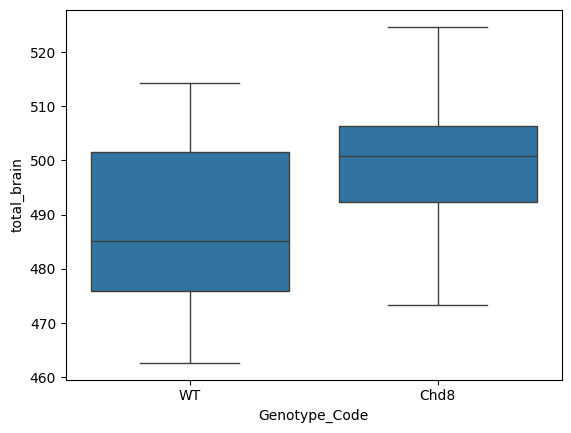

In [80]:
seaborn.boxplot(x='Genotype_Code', y='total_brain', data=chd8_df)

In [91]:
import numpy as np
from scipy.stats import ttest_ind

In [98]:
wt_volumes = chd8_df[chd8_df['Genotype_Code'] == 'WT']['total_brain']
chd8_volumes = chd8_df[chd8_df['Genotype_Code'] == 'Chd8']['total_brain']

t_stat, p_value = ttest_ind(wt_volumes, chd8_volumes)
print(f"T-statistiek: {t_stat}")
print(f"P-waarde: {p_value}")


T-statistiek: -1.5925672368610015
P-waarde: 0.125524863456697
